# Noise PSDs by USRP Power
## Import the libraries

In [1]:
import sys, os, glob, h5py
import time, datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import PyMKID_USRP_functions as PUf
import PyMKID_resolution_functions as Prf
import TimestreamHelperFunctions as Thf

## Load some parameters

In [2]:
## MB Results come from fitting a temperature scan at a specified RF power
use_nexus_MBvals = False

if use_nexus_MBvals:
    ## As measured in NEXUS
    MB_fit_vals = np.array([4.24216+9.75e-6, 
                            0.177  ,
                            0.0125 ,
                            4.1e7  ]) ## [ F0 [GHz] , Delta [meV] , alpha , Qi0 ]
else:
    ## As measured on Caltech sister device (https://arxiv.org/pdf/2111.08064.pdf)
    MB_fit_vals = np.array([4.24201000, 
                            0.184     ,
                            0.03801   ,
                            4.05538e5 ]) ## [ F0 [GHz] , Delta [meV] , alpha , Qi0 ]
    
## How much attenuation is in the lines before the chip
line_atten_dB_NEXUS = 56.5

## Define the noise runs in power order

In [3]:
## 11/8 Al Runs - Shield Closed, No Laser, No sources (NR 15)
series_list = np.array([
    "20221108_093729",
    "20221108_093600",
    "20221108_093431",
    "20221108_093301",
    "20221108_093132",
    "20221108_093003",
    "20221108_092834",
    "20221108_092702",
    "20221108_092534",
    "20221108_092406",
    "20221108_092238",
    "20221108_092104",
])

P_min = -70 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)

In [4]:
series_list = series_list[2:-3][::-1]
powers_list = powers_list[2:-3][::-1]

In [5]:
pwr_on_chip = powers_list - line_atten_dB_NEXUS

In [6]:
for i in np.arange(len(series_list)):
    print(series_list[i], ":", powers_list[i],"/",pwr_on_chip[i], "dBm")

20221108_092534 : -55 / -111.5 dBm
20221108_092702 : -50 / -106.5 dBm
20221108_092834 : -45 / -101.5 dBm
20221108_093003 : -40 / -96.5 dBm
20221108_093132 : -35 / -91.5 dBm
20221108_093301 : -30 / -86.5 dBm
20221108_093431 : -25 / -81.5 dBm


## Load the metadata

In [7]:
sum_file, dly_file, vna_file, tone_files = Thf.GetFiles('20221108_092702', verbose=True)
metadata, avg_frqs, avg_S21s = Thf.UnpackSummary(sum_file)
print(avg_frqs, avg_S21s)

Line Delay file:  None
VNA scan file:    USRP_VNA_20221108_092702.h5
Noise ts files:   ['USRP_Noise_20221108_092702_delta0.h5']
Laser ts files:   []
Summary file:	 noise_averages_20221108_092702.h5
[4241.98819  4241.988859 4241.989527] [0.00405626+0.001843j   0.00405794+0.0018361j  0.00405337+0.00184307j]


## Show an example timestream and PSD

In [8]:
powers, PSDs, res, timestreams = Thf.CleanPSDs(tone_files[0], vna_file, f_transient=0.075,
                                               charFs = avg_frqs,
                                               charZs = avg_S21s,
                                               MBresults = MB_fit_vals,
                                               show_plots = False,
                                               verbose = False)

pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20221108/20221108_092702/USRP_Noise_20221108_092702_delta0.h5 because override=True!
found 6 pulses
computed electronics basis
cleaning...
saving clean_data to /data/USRP_Noise_Scans/20221108/20221108_092702/USRP_Noise_20221108_092702_delta0_cleaned.h5 because override=True!
Converting to resonator basis!
Converting to quasiparticle basis!


## Calculate and plot PSDs for every power

In [9]:
%matplotlib notebook

In [10]:
f_interst = [1.0e3]

<IPython.core.display.Javascript object>


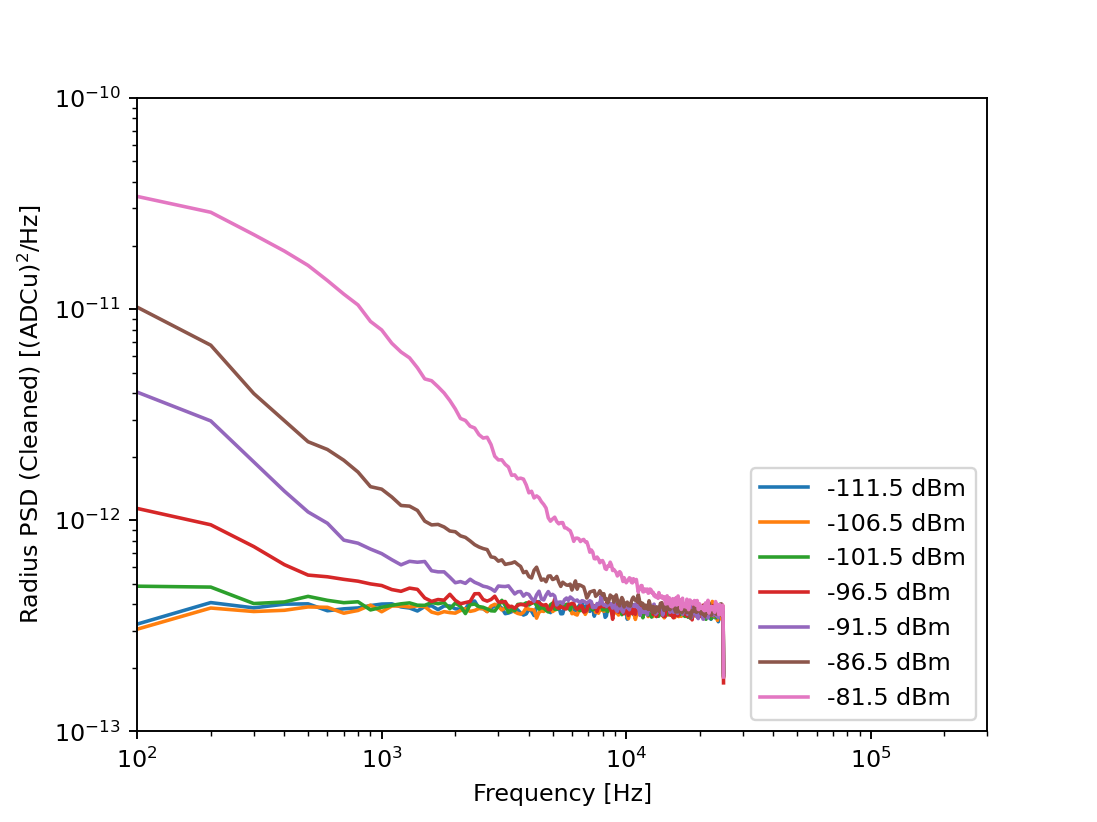

<IPython.core.display.Javascript object>


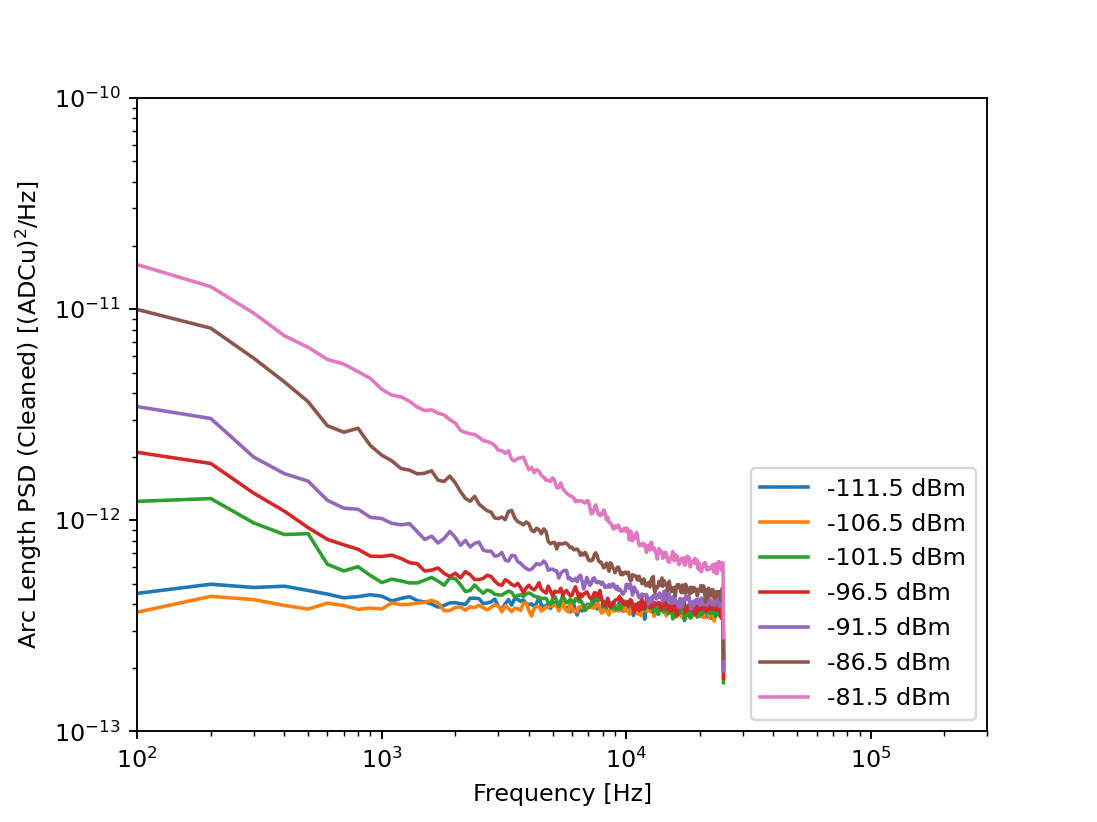

<IPython.core.display.Javascript object>


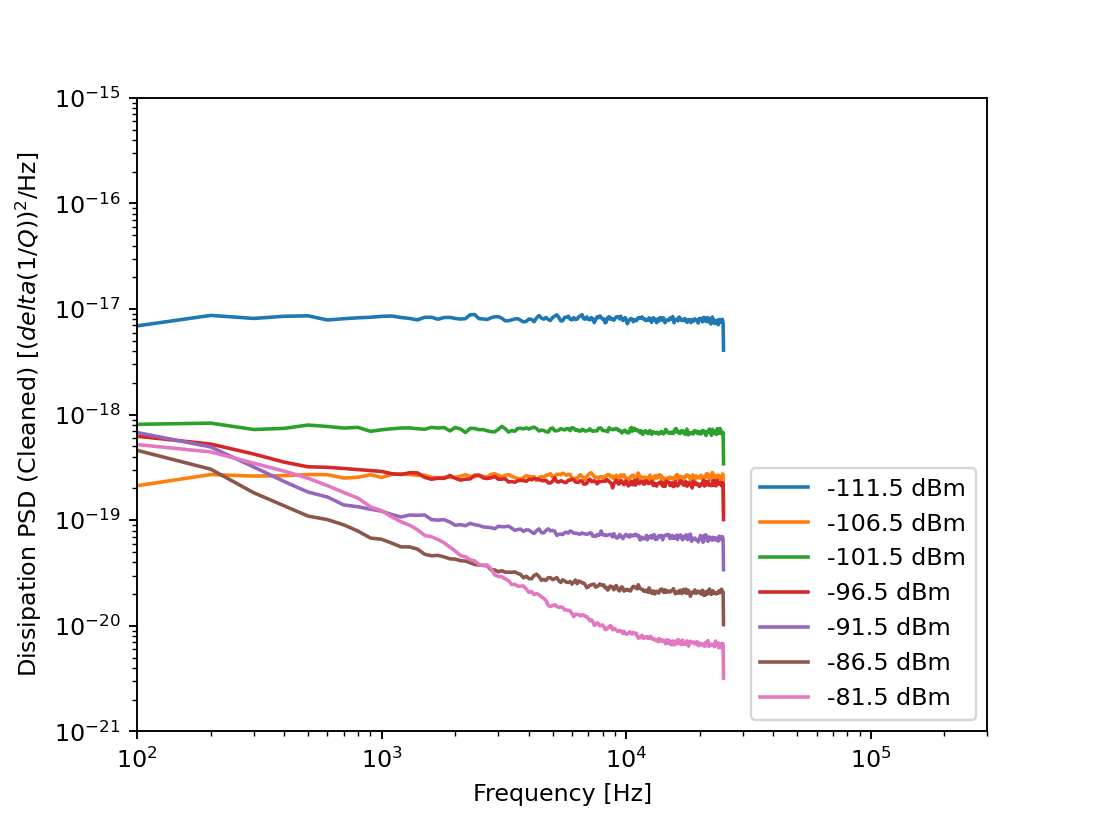

<IPython.core.display.Javascript object>


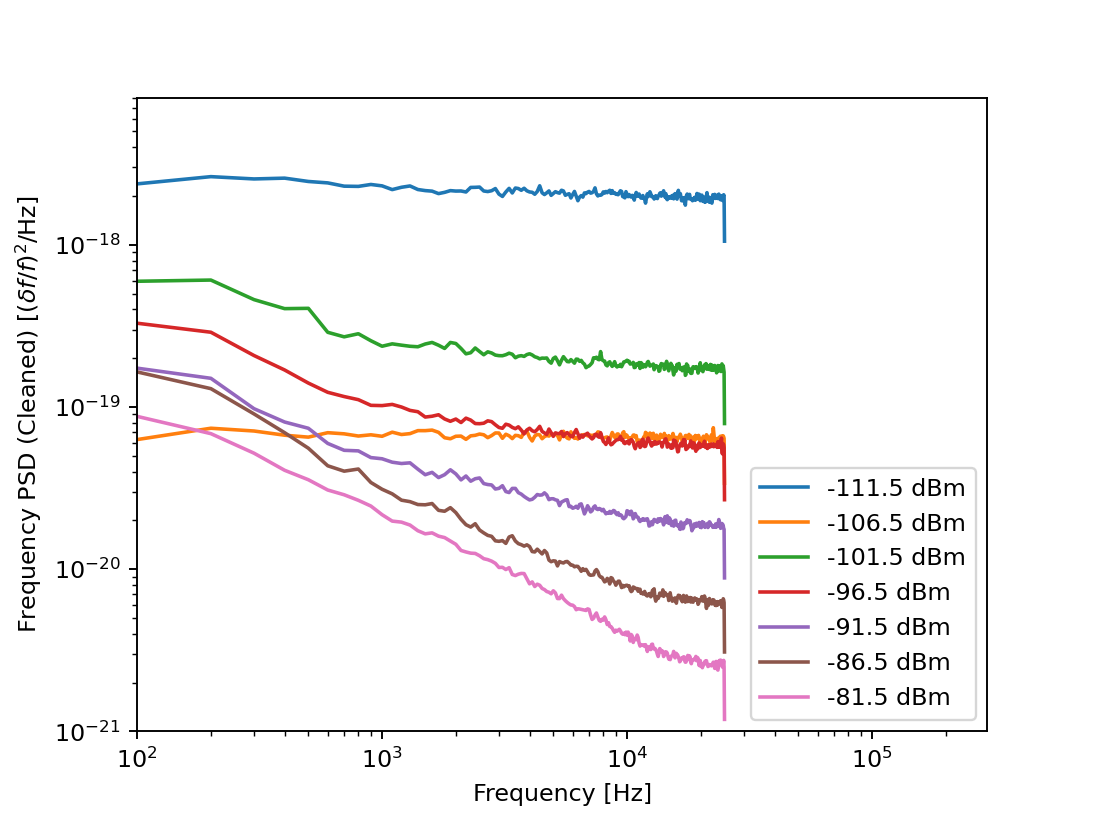

<IPython.core.display.Javascript object>


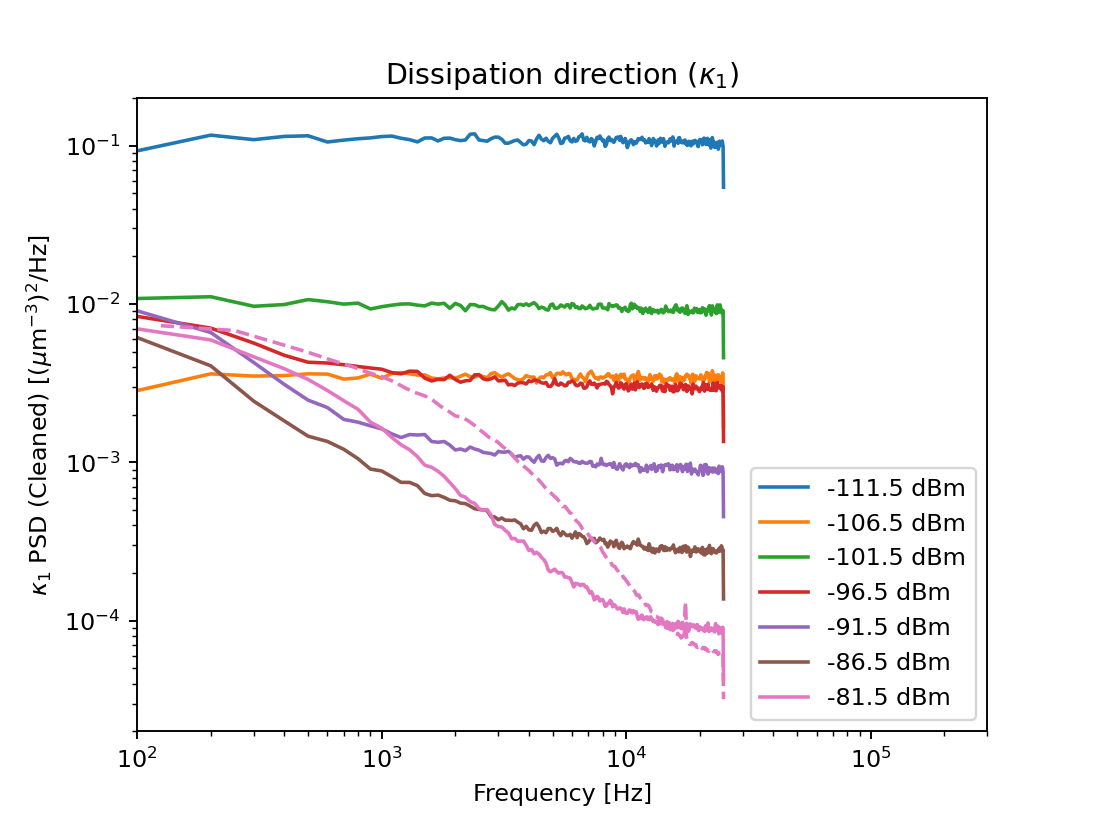

<IPython.core.display.Javascript object>


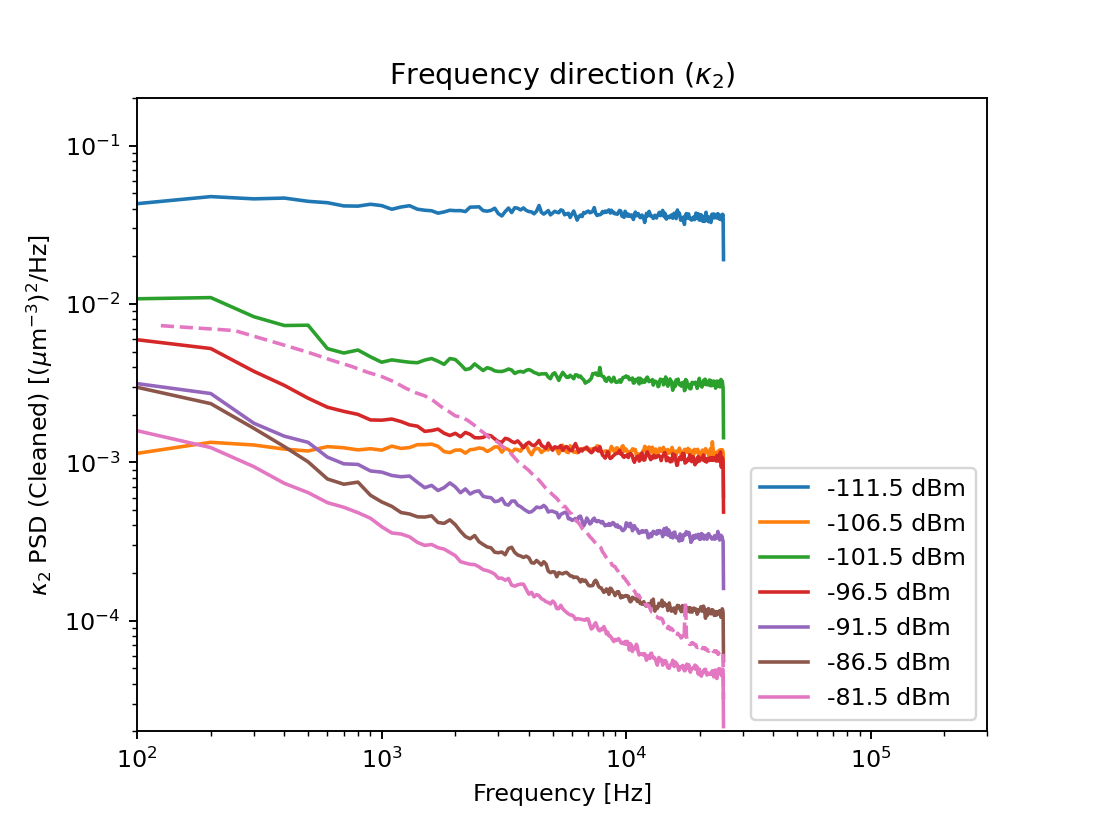

pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20221108/20221108_092534/USRP_Noise_20221108_092534_delta0.h5 because override=True!
found 3 pulses
computed electronics basis
cleaning...
saving clean_data to /data/USRP_Noise_Scans/20221108/20221108_092534/USRP_Noise_20221108_092534_delta0_cleaned.h5 because override=True!
Converting to resonator basis!
Converting to quasiparticle basis!
pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20221108/20221108_092702/USRP_Noise_20221108_092702_delta0.h5 because override=True!
found 6 pulses
computed electronics basis
cleaning...
saving clean_data to /data/USRP_Noise_Scans/20221108/20221108_092702/USRP_Noise_20221108_092702_delta0_cleaned.h5 because override=True!
Converting to resonator basis!
Converting to quasiparticle basis!
pulse time data already exists! If you set override=False,

In [11]:
psd_interst = Thf.PlotPSDsByPower(series_list, pwr_on_chip, 
    fHz_range     = [1e2,3e5],
    e_b_PSDrange  = [1e-13,1e-10], 
    r_b_PSDrange  = [1e-21,1e-15],
    q_b_PSDrange  = [2e-5,2e-1],
    MB_fit_result = MB_fit_vals,
    PSD_lo_f      = 1e2, 
    PSD_hi_f      = 5e4, 
    f_transient   = 0.2,
    f_data        = f_interst,
    verbose       = False
)

In [12]:
print(psd_interst)

{-111.5: array([[1.00000000e+03, 4.01162297e-13, 4.37276476e-13, 8.53166472e-18,
        2.31048837e-18, 1.13960076e-01, 4.17749858e-02]]), -106.5: array([[1.00000000e+03, 3.68943673e-13, 3.80129306e-13, 2.54400336e-19,
        6.60494854e-20, 3.39805671e-03, 1.19420311e-03]]), -101.5: array([[1.00000000e+03, 3.87354260e-13, 5.07327084e-13, 7.19638186e-19,
        2.37129922e-19, 9.61242786e-03, 4.28744782e-03]]), -96.5: array([[1.00000000e+03, 4.91034167e-13, 6.74041657e-13, 2.90037668e-19,
        1.02114163e-19, 3.87412212e-03, 1.84628387e-03]]), -91.5: array([[1.00000000e+03, 6.95280117e-13, 1.01942857e-12, 1.21832151e-19,
        4.79990845e-20, 1.62734938e-03, 8.67851545e-04]]), -86.5: array([[1.00000000e+03, 1.40397523e-12, 2.03520084e-12, 6.60938920e-20,
        3.11376957e-20, 8.82836287e-04, 5.62987731e-04]]), -81.5: array([[1.00000000e+03, 7.96300472e-12, 4.17536272e-12, 1.23186450e-19,
        2.17004596e-20, 1.64543875e-03, 3.92356951e-04]])}


## Read in the Caltech PSD data

In [13]:
path  = "/data/Misc"
f_pfx = "LTD19 "
f_sfx = " noise qp.csv"

k1_data = np.loadtxt(os.path.join(path,f_pfx+"k1"+f_sfx), delimiter=",", skiprows=1)
k2_data = np.loadtxt(os.path.join(path,f_pfx+"k1"+f_sfx), delimiter=",", skiprows=1)

caltech_powers = np.array([-80])
caltech_powers = np.arange(start=-110, stop=-75, step=5)
print(caltech_powers)

[-110 -105 -100  -95  -90  -85  -80]


In [14]:
## Count how many columns of PSDs there are
## assuming the first column is the shared frequency values
n_psd_cols = np.shape(k1_data)[1]-1

## Loop over every PSD (by power)
for i in np.arange(n_psd_cols)+1:
    ## Pick the color
    c = "C" + str(7-i)
    
    ## Add the k1 data to the right plot
    ax1 = plt.figure(5).gca()
    ax1.plot(k1_data[:,0],k1_data[:,i],color=c,ls='--',label="Caltech "+str(caltech_powers[i-1])+" dBm")
    
    ax2 = plt.figure(6).gca()
    ax2.plot(k2_data[:,0],k2_data[:,i],color=c,ls='--',label="Caltech "+str(caltech_powers[i-1])+" dBm")

## Check the readout frequencies for each power

In [15]:
for i in np.arange(len(series_list)):
    sum_file, dly_file, vna_file, tone_files = Thf.GetFiles(series_list[i], verbose=False)
    metadata, avg_frqs, avg_S21s = Thf.UnpackSummary(sum_file)
    print(series_list[i],"(",pwr_on_chip[i],"dBm) f_r:", avg_frqs[0], "MHz")

20221108_092534 ( -111.5 dBm) f_r: 4242.048011 MHz
20221108_092702 ( -106.5 dBm) f_r: 4241.98819 MHz
20221108_092834 ( -101.5 dBm) f_r: 4242.047471 MHz
20221108_093003 ( -96.5 dBm) f_r: 4242.047559 MHz
20221108_093132 ( -91.5 dBm) f_r: 4242.0474349999995 MHz
20221108_093301 ( -86.5 dBm) f_r: 4242.047036999999 MHz
20221108_093431 ( -81.5 dBm) f_r: 4242.046378999999 MHz


## Investigate TLS contribution

In [54]:
def dBm_to_mW(dBm):
    return 1.0 * np.power(10,dBm/10)

In [55]:
df_f_PSD_pts = np.zeros(len(pwr_on_chip))

for i in np.arange(len(pwr_on_chip)):
    d = psd_interst[pwr_on_chip[i]][0]
    df_f_PSD_pts[i] = d[4]
    print(pwr_on_chip[i],d[0],d[4],dBm_to_mW(pwr_on_chip[i]))

-111.5 1000.0 2.310488366676152e-18 7.079457843841373e-12
-106.5 1000.0 6.604948542585556e-20 2.2387211385683377e-11
-101.5 1000.0 2.3712992225986054e-19 7.079457843841374e-11
-96.5 1000.0 1.0211416264230633e-19 2.2387211385683377e-10
-91.5 1000.0 4.799908452479194e-20 7.079457843841373e-10
-86.5 1000.0 3.1137695686175265e-20 2.2387211385683377e-09
-81.5 1000.0 2.170045956471819e-20 7.0794578438413736e-09


<IPython.core.display.Javascript object>


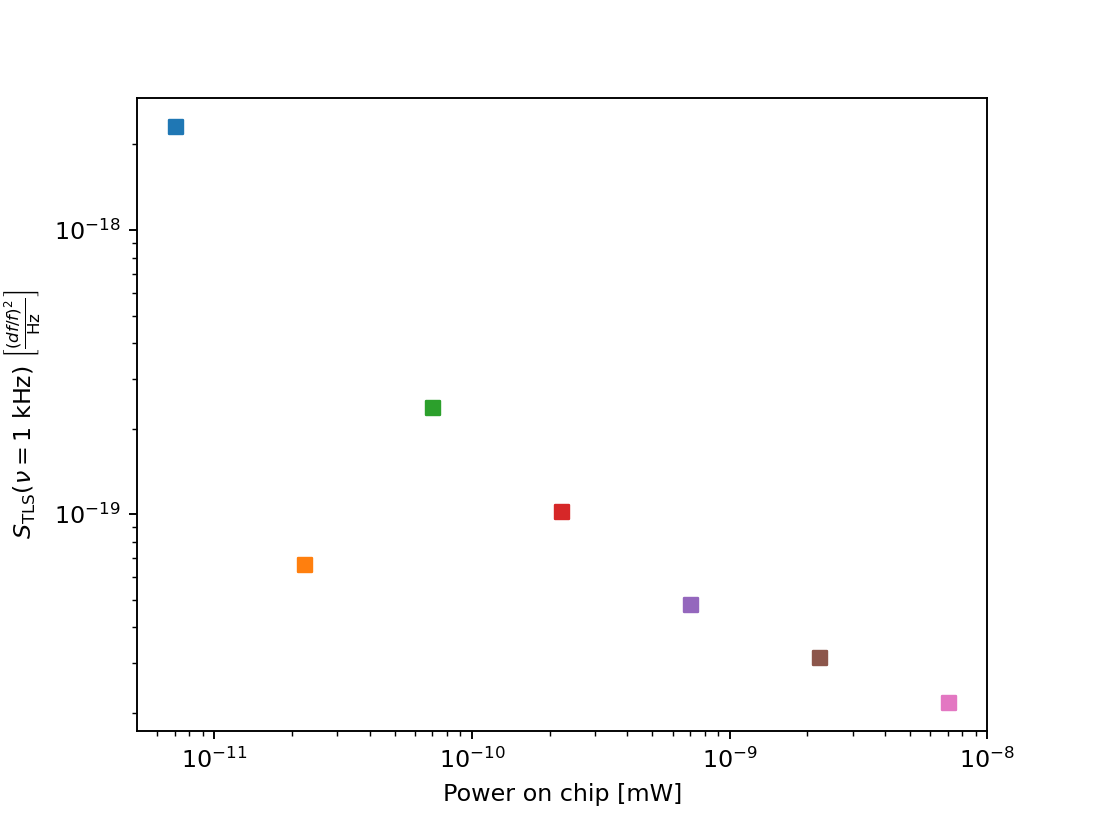

In [168]:
fig = plt.figure()
ax1 = fig.gca()
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylabel(r"$S_\mathrm{TLS}(\nu=1$ kHz) $\left[ \frac{(df/f)^2}{\mathrm{Hz}} \right]$")
ax1.set_xlabel("Power on chip [mW]")

for i in np.arange(len(pwr_on_chip)):
    ax1.scatter(dBm_to_mW(pwr_on_chip[i]),df_f_PSD_pts[i],marker='s',color='C'+str(i))

<IPython.core.display.Javascript object>


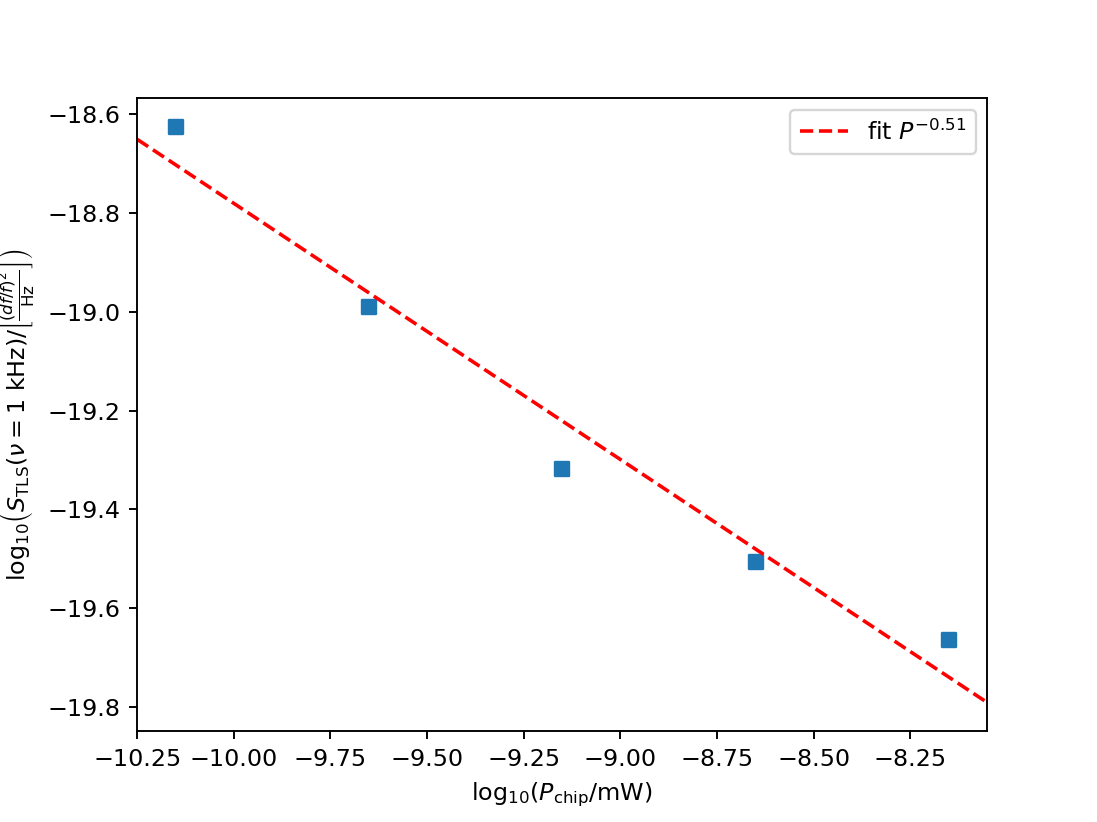

k= -0.5185668731555503
a= 1.081745875052831e-24


In [172]:
from scipy.optimize import curve_fit

def pow_law(x,A,n):
    return A * np.power(x,n)

line = lambda lx,la,k: la + k*lx

# lx_data = np.log10(dBm_to_mW(pwr_on_chip[pwr_on_chip != -106.5]))
# ly_data = np.log10(df_f_PSD_pts[pwr_on_chip != -106.5])

lx_data = np.log10(dBm_to_mW(pwr_on_chip[2:]))
ly_data = np.log10(df_f_PSD_pts[2:])

popt, pcov = curve_fit(line,lx_data,ly_data,p0=[-25,-0.5])

ax1 = plt.figure().gca()
ax1.set_xlabel(r"$\log_{10}(P_\mathrm{chip}/\mathrm{mW})$")
ax1.set_ylabel(r"$\log_{10}\left(S_\mathrm{TLS}(\nu=1 ~\mathrm{kHz}) / \left[ \frac{(df/f)^2}{\mathrm{Hz}} \right] \right)$")
ax1.scatter(lx_data,ly_data,marker='s',color='C0')

xlims = ax1.get_xlim()
xvals = np.linspace(start=xlims[0],stop=xlims[1],num=5)
yvals = line(xvals,popt[0],popt[1])
ax1.plot(xvals,yvals,'r--',label=r"fit $P^{"+str(int(100.0*popt[1])/100.0)+"}$")
ax1.legend()
ax1.set_xlim(xlims)

print("k=", popt[1])
print("a=", 10**popt[0])

<IPython.core.display.Javascript object>


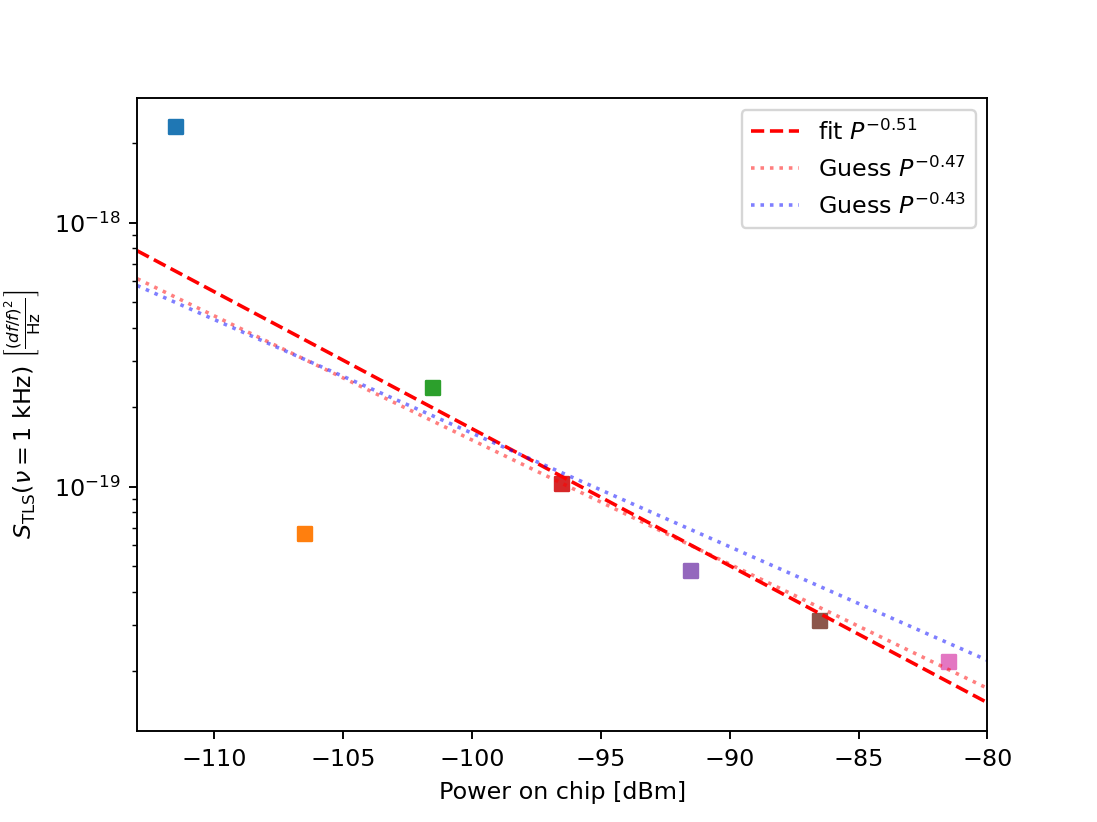

In [174]:
fig = plt.figure()
ax1 = fig.gca()
ax1.set_yscale('log')
ax1.set_ylabel(r"$S_\mathrm{TLS}(\nu=1$ kHz) $\left[ \frac{(df/f)^2}{\mathrm{Hz}} \right]$")
ax1.set_xlabel("Power on chip [dBm]")

for i in np.arange(len(pwr_on_chip)):
    ax1.scatter(pwr_on_chip[i],df_f_PSD_pts[i],marker='s',color='C'+str(i))
    
xlims = ax1.get_xlim()
xvals = np.linspace(start=xlims[0],stop=xlims[1],num=10)
yvals = pow_law(dBm_to_mW(xvals),10**popt[0],popt[1])
ax1.plot(xvals,yvals,'r--',label=r"fit $P^{"+str(int(100*popt[1])/100.)+"}$")

ax1.plot(xvals,pow_law(dBm_to_mW(xvals),3.0e-24,-0.47),'r:',alpha=0.5,label=r"Guess $P^{-0.47}$")
ax1.plot(xvals,pow_law(dBm_to_mW(xvals),0.8e-23,-0.43),'b:',alpha=0.5,label=r"Guess $P^{-0.43}$")
# ax1.plot(xvals,pow_law(dBm_to_mW(xvals),5.5e-25,-0.55),'g:' ,alpha=0.5,label=r"$P^{-0.55}$")

ax1.set_xlim(xlims)
ax1.legend()